In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('housetrain.csv')

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


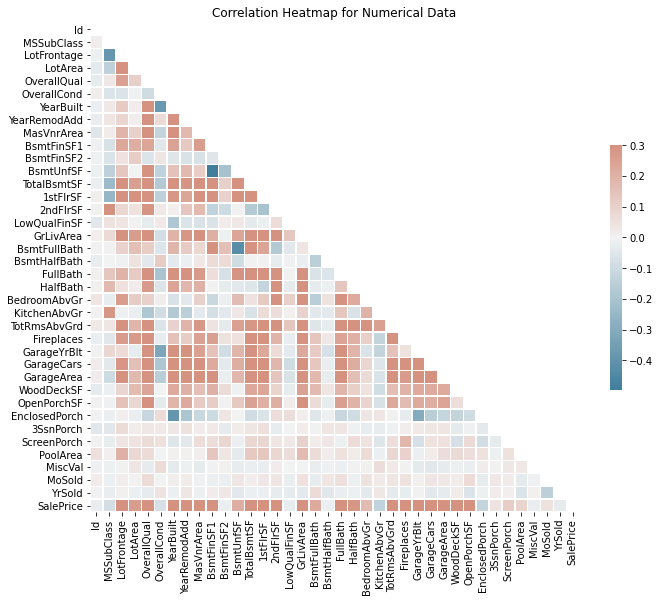

In [ ]:
#generate corr heatmap
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap for Numerical Data')
plt.show()

In [ ]:
#corr of features with y
corr[-1:]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.38642,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,0.046432,-0.028923,1.0


In [ ]:
#view of data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [3]:
df = pd.read_csv('housetrain.csv')
df.iloc[:,1].dtype

dtype('int64')

In [3]:
#PREPROCESSING
df = pd.read_csv('housetrain.csv')
y = df['SalePrice']
#convert data type to categorical data 
nrow, ncol = df.shape
for i in range(0, ncol - 1): 
    if df.iloc[:,i].dtype == 'O':
        df.iloc[:,i] = df.iloc[:,i].astype('category')
#manually set some categorical data to ordered, specify order types [According to Data Dictionary]
#use numeric encoding for ORDERED categorical columns
#use ONE HOT encoding for NOMINAL categorical columns
pd.Categorical(df['OverallQual'], ordered=True) #of int type (do not need to convert)

df['ExterQual'] = df['ExterQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['ExterQual'] = df['ExterQual'].cat.codes

df['ExterCond'] = df['ExterCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['ExterCond'] = df['ExterCond'].cat.codes

df['BsmtQual'] = df['BsmtQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['BsmtQual'] = df['BsmtQual'].cat.codes

df['BsmtCond'] = df['BsmtCond'].cat.reorder_categories(['Po','Fa','TA','Gd'], ordered = True)
df['BsmtCond'] = df['BsmtCond'].cat.codes

df['BsmtFinType1'] = df['BsmtFinType1'].cat.reorder_categories(['Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)
df['BsmtFinType1'] = df['BsmtFinType1'].cat.codes

df['BsmtFinType2']= df['BsmtFinType2'].cat.reorder_categories(['Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)
df['BsmtFinType2']= df['BsmtFinType2'].cat.codes

df['HeatingQC'] = df['HeatingQC'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['HeatingQC'] = df['HeatingQC'].cat.codes

df['KitchenQual'] = df['KitchenQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['KitchenQual'] = df['KitchenQual'].cat.codes

df['FireplaceQu']= df['FireplaceQu'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['FireplaceQu']= df['FireplaceQu'].cat.codes

df['GarageQual'] = df['GarageQual'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['GarageQual'] = df['GarageQual'].cat.codes

df['GarageCond'] = df['GarageCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['GarageCond'] = df['GarageCond'].cat.codes

print(df.shape)
#DROP columns that contain too many NaN
df = df.drop(columns=['PoolQC','Id','SalePrice'])
print(df.shape)
#use ONE HOT encoding for NOMINAL categorical columns 
df = pd.get_dummies(df)
print(df.shape)

(1460, 81)
(1460, 78)
(1460, 243)


In [5]:
#take a look at sale Price
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,2,2,2,2,5,706,0,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,2,8,0,-1,2003.0,2,548,2,2,0,61,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,1,2,2,2,4,978,0,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,1,6,1,2,1976.0,2,460,2,2,298,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,2,2,2,2,5,486,0,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,2,6,1,2,2001.0,2,608,2,2,0,42,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,1,2,1,3,4,216,0,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,2,7,1,3,1998.0,3,642,2,2,0,35,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,2,2,2,2,5,655,0,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,2,2000.0,3,836,2,2,192,84,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Linear Regression Model


In [4]:
#Split test and training sample
#fill NaN
df = df.fillna(df.mean())
from sklearn.model_selection import train_test_split
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#linear regression as basis
#standaridization (fit scaler on TRAINING data only)
from sklearn.preprocessing import StandardScaler 
standardizer = StandardScaler()
Xstandardized = pd.DataFrame(standardizer.fit_transform(X_train))
test_Xstandardized = pd.DataFrame(standardizer.transform(X_test))

#vanilla linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(Xstandardized, y_train)
y_train_predict = linear.predict(Xstandardized)

#MSE train
from sklearn.metrics import mean_squared_error
train_RMSE = mean_squared_error(y_train, y_train_predict, squared = False)
print('train RMSE', train_RMSE)
#MSE Test
y_test_predict = linear.predict(test_Xstandardized)
test_RMSE = mean_squared_error(y_test, y_test_predict, squared = False)
print('test RMSE', test_RMSE)

train RMSE 21141.58259678246
test RMSE 190212133572100.1


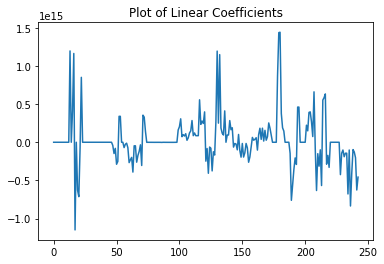

In [8]:
#Visualize Linear Coefficients: Few variables with strong predictive power, the rest is close to 0
#max is over 7000, min is close to -300
linear_coef = pd.DataFrame(linear.coef_)
plt.plot(linear_coef)
plt.title('Plot of Linear Coefficients')
plt.show()

**Log Transform of y to satisfy normality assumption**


*   Histogram shows that applying log to house sale price (y) reduces the positive skewness
*   Result: has (unexplicable) higher MSE value (RMSE^2)
*   Coefficients do not have extreme values





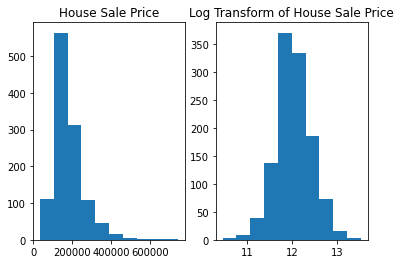

In [9]:
#log transformation of y 
fig, axs = plt.subplots(nrows = 1, ncols=2)
axs[0].hist(y_train)
axs[0].set_title("House Sale Price")
axs[1].hist(y_train.apply(np.log))
axs[1].set_title("Log Transform of House Sale Price")
plt.show()
#log transform satisfies the normality assumption 

In [6]:
###linear regression with log-transformed y###

from sklearn.linear_model import LinearRegression
log_linear = LinearRegression()
log_y_train = y_train.apply(np.log) #log transformation
log_linear.fit(Xstandardized, log_y_train)
y_train_predict = log_linear.predict(Xstandardized)

#MSE train
from sklearn.metrics import mean_squared_error
exp_y_train_predict = pd.DataFrame(y_train_predict).apply(np.exp)

#train_MSE = mean_squared_error(y_train, exp_y_train_predict, squared=False)
train_MSE = mean_squared_error(pd.DataFrame(y_train), y_train_predict, squared=False)
print('train RMSE', train_MSE)

#MSE test
y_test_predict = log_linear.predict(test_Xstandardized)
exp_y_test_predict = pd.DataFrame(y_test_predict).apply(np.exp)
#log_y_test = y_test.apply(np.log) #apply same log transform
#test_MSE = mean_squared_error(y_test, exp_y_test_predict, squared=False)
test_MSE = mean_squared_error(pd.DataFrame(y_test_predict).apply(np.log), y_test_predict, squared=False)
print('test RMSE', test_MSE)

train RMSE 197183.07089738976
test RMSE 47337528.596290186


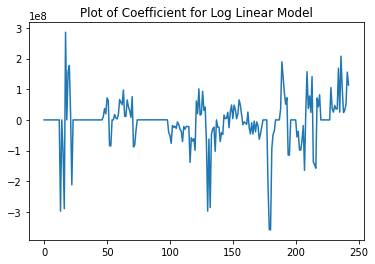

In [11]:
#visualize log_y linear model coefficients
#less extreme but 
log_linear_coef = pd.DataFrame(log_linear.coef_)
plt.plot(log_linear_coef) 
plt.title('Plot of Coefficient for Log Linear Model')
plt.show()

##Linear Model with Regularization

Select the best learning rate for Ridge and Lasso regression using validation set

In [7]:
#tune learning rate alpha function
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
def tune_lambda(alpha_list, regNorm, X, y):
    'use cross validation to choose learning rate with min test MSE'
    min_RMSE = 10e100 
    alpha = -1
    RMSE_list = []
    for a in alpha_list:
        if regNorm == 2:
            clf = Ridge(alpha = a)
            scores = cross_val_score(clf, X, y, cv=5, scoring = 'neg_root_mean_squared_error')           
            l2_rmse = (-1)*scores.mean()
            RMSE_list.append(l2_rmse)
            if l2_rmse < min_RMSE:
                min_RMSE = l2_rmse
                alpha = a
            
        
        if regNorm == 1: 
            l1m = Lasso(alpha = a, tol=0.001, max_iter=100000)
            scores = cross_val_score(l1m, X, y, cv=5, scoring = 'neg_root_mean_squared_error')
            l1_rmse = (-1)*scores.mean()
            RMSE_list.append(l1_rmse)
            if l1_rmse < min_RMSE:
                min_RMSE = l1_rmse
                alpha = a
    
    return alpha, min_RMSE, RMSE_list

In [13]:
def plot_loss_lambda(alpha, regNorm, X_train, y_train, X_test, y_test):
    '''
    alpha: list of possible alpha values
    title: string, title of the plot
    regNorm: type of regularization applied
    return: a plot that plots train and test loss with respect to different alpha values
    '''
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    loss_train = []
    loss_test = []
    for a in alpha:
        if regNorm == 2:
            clf = Ridge(alpha = a)
            clf.fit(X_train, y_train)
            #l2_train_predict = clf.predict(Xstandardized)
            #l2_loss_train = mean_squared_error(y_train, l2_train_predict)
            #loss_train.append(l2_loss_train)
            
            l2_test_predict = clf.predict(X_test)
            l2_loss_test = mean_squared_error(y_test, l2_test_predict, squared=False)
            loss_test.append(l2_loss_test)
            
        
        if regNorm == 1: 
            l1m = Lasso(alpha = a)
            l1m.fit(X_train, y_train)
            #l1_train_predict = l1m.predict(Xstandardized)
            #l1_loss_train = mean_squared_error(y_train, l1_train_predict)
            #loss_train.append(l1_loss_train)

            l1_test_predict = l1m.predict(X_test)
            l1_loss_test = mean_squared_error(y_test, l1_test_predict, squared=False)
            loss_test.append(l1_loss_test * 1000)
    
    #print('loss_train', loss_train)
    print('loss_test',loss_test)
    return loss_test
    '''
    fig, ax = plt.subplots()
    ax.set_xlabel('alpha')
    ax.set_ylabel('Training Loss')
    ax2 = ax.twinx()
    ax2.set_ylabel('Test Loss',color = 'blue')
   
    ax.plot(alpha, loss_train)
    ax2.plot(alpha, loss_test)
    fig.tight_layout()
    plt.title(title)
    plt.show()
    '''

In [16]:
lambdalist=[l*0.01 for l in range(1,500)]

lambda2, min_RMSE, RMSE_list = tune_lambda(lambdalist, 2, Xstandardized, y_train)
print('[L2 regularization] best lambda is', lambda2, 'min MSE is', min_RMSE)

[L2 regularization] best lambda is 4.99 min MSE is 36465.72138069916


loss_test [29469.85013006087, 29469.518286669067, 29469.187466466585, 29468.85766205462, 29468.528866134948, 29468.201071486612, 29467.87427095486, 29467.54845747325, 29467.223624044364, 29466.89976373851, 29466.576869702432, 29466.25493515328, 29465.933953372863, 29465.61391771915, 29465.294821611653, 29464.976658540385, 29464.659422060795, 29464.343105790973, 29464.027703419335, 29463.713208692596, 29463.39961542258, 29463.086917484874, 29462.775108813472, 29462.464183402815, 29462.154135311448, 29461.84495865232, 29461.53664759891, 29461.229196382938, 29460.922599294212, 29460.61685067361, 29460.31194492403, 29460.00787649837, 29459.704639906475, 29459.402229713396, 29459.10064053236, 29458.799867032358, 29458.499903933814, 29458.20074600686, 29457.90238807486, 29457.604825007606, 29457.3080517262, 29457.012063200527, 29456.71685444832, 29456.422420533545, 29456.12875656938, 29455.835857713813, 29455.543719172183, 29455.25233619293, 29454.961704071953, 29454.67181814735, 29454.38267

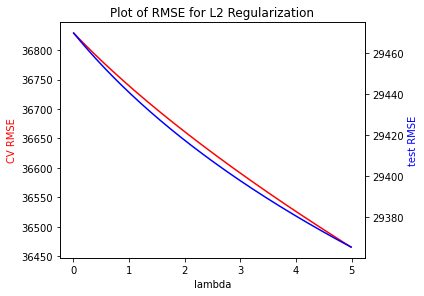

In [17]:
#plot CV and test RMSE
rmse_test2 = plot_loss_lambda(lambdalist,2, Xstandardized, y_train, test_Xstandardized, y_test)

fig, ax = plt.subplots()
ax.set_xlabel('lambda')
ax.set_ylabel('CV RMSE', color = "red")
ax2 = ax.twinx()
ax2.set_ylabel('test RMSE',color = 'blue')
   
ax.plot(lambdalist, RMSE_list ,color = "red")
ax2.plot(lambdalist, rmse_test2, color="blue")
fig.tight_layout()
plt.title("Plot of RMSE for L2 Regularization")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 821.15898724203, tolerance: 696.6594843571944
  positive)


loss_test [29266.473369115054, 29233.441311075454, 29219.209009462404, 29212.541335958722, 29217.391822797712, 29229.428693072223, 29215.60508746103, 29181.905540606334, 29143.686094947225, 29106.00017367866, 29074.872796467233, 29048.45754985086, 29026.08479321695, 29006.83189089769, 28989.454549490056, 28977.913865119666, 28966.888109998385, 28956.447300668977, 28949.653970383093, 28947.028375639617, 28941.95946190989, 28937.874690674165, 28935.490950079646, 28935.180001275203, 28936.104532348145, 28935.808691694154, 28936.74129363348, 28938.978778962253, 28941.31166065394, 28943.0932540529, 28942.167115377524, 28942.277419937785, 28942.72156534489, 28944.50917442332, 28947.961999232386, 28950.877465745045, 28953.715507913348, 28957.400554403564, 28961.688603057974, 28966.267680399633, 28971.214698900425, 28976.762326136926, 28982.941450238683, 28986.56956200594, 28988.788934737877, 28990.64868482421, 28992.9456856185, 28995.480362689395, 28995.51509020034, 28995.02948526783, 28994.8

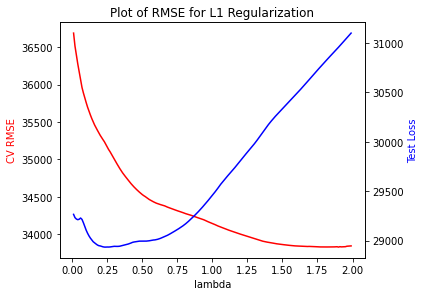

In [21]:
#plot RMSE for L1 Regularization

alphalist=[l*0.01 for l in range(1,200)]
rmse_test = plot_loss_lambda(alphalist,1, Xstandardized, y_train/1000, test_Xstandardized, y_test/1000) #return test RMSE for the same list of regularization param 

fig, ax = plt.subplots()
ax.set_xlabel('lambda')
ax.set_ylabel('CV RMSE',color = "red")
ax2 = ax.twinx()
ax2.set_ylabel('Test Loss',color = 'blue')
   
ax.plot(alphalist, np.multiply(1000, RMSE_list1), color = "red")
ax2.plot(alphalist, rmse_test, color="blue")
fig.tight_layout()
plt.title("Plot of RMSE for L1 Regularization")
plt.show()

In [20]:
#use cross validation to select best lambda
lambda1, min_RMSE1, RMSE_list1 = tune_lambda(alphalist, 1, Xstandardized, y_train/1000)
print('[L1 regularization] best lambda is', lambda1, 'min MSE is', min_RMSE1*1000)

[L1 regularization] best lambda is 1.9000000000000001 min MSE is 33830.038429188215


In [8]:
#Linear Regression with Regularization Terms 
#L2
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 4.99)
clf.fit(Xstandardized, y_train)
l2_train_predict = clf.predict(Xstandardized)
#MSE train
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_train, l2_train_predict, squared=False)
print('train rmse', train_rmse)
#MSE Test
 
l2_y_test_predict = clf.predict(test_Xstandardized)
test_rmse = mean_squared_error(y_test, l2_y_test_predict,squared=False)
print('test rmse', test_rmse)
##Plot Test and Train Loss as a function of alpha
#TODO:


train rmse 21159.487033602825
test rmse 29365.55845842088


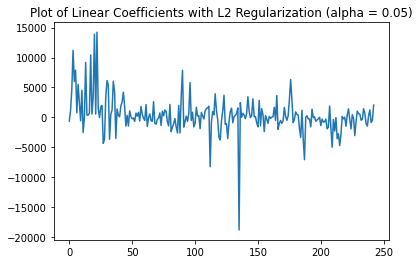

In [23]:
clf_coef = pd.DataFrame(clf.coef_)
plt.plot(clf_coef) 
#plt.ylim(-25, 25)
plt.title('Plot of Linear Coefficients with L2 Regularization (alpha = 0.05)')
plt.show()

In [9]:
#L1 Regression
#Todo: 
from sklearn.linear_model import Lasso
l1m = Lasso(alpha = 0.25)
l1m.fit(Xstandardized, y_train)
l1_train_predict = l1m.predict(Xstandardized)

#Train MSE:
from sklearn.metrics import mean_squared_error
l1_train_rmse = mean_squared_error(y_train, l1_train_predict,squared=False)
print("l1 train rmse:", l1_train_rmse)

#Test MSE:
l1_y_test_predict = l1m.predict(test_Xstandardized)
l1_test_rmse = mean_squared_error(y_test, l1_y_test_predict,squared=False)
print("l1 test rmse:", l1_test_rmse)



l1 train rmse: 21141.573248420973
l1 test rmse: 29346.492176766496


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33512200980.737305, tolerance: 696659484.3571944
  positive)


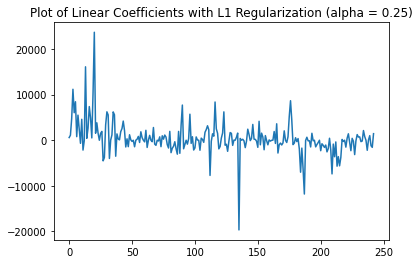

In [25]:
l1m_coef = pd.DataFrame(l1m.coef_)
plt.plot(l1m_coef) 
#plt.ylim(-100, 100)
plt.title('Plot of Linear Coefficients with L1 Regularization (alpha = 0.25)')
plt.show()

# Log Transform of Y with Regularization

In [26]:
#train L2 reg with CV
lambda2, min_RMSE, RMSE_list = tune_lambda(lambdalist, 2, Xstandardized, log_y_train)
print('[L2 regularization + log transform] best lambda is', lambda2, 'min RMSE is', min_RMSE)

[L2 regularization + log transform] best lambda is 4.99 min RMSE is 0.15420080840590972


In [ ]:
#plot l2 reg CV and test RMSE
log_y_test = pd.DataFrame(y_test).apply(np.log)

rmse_test2 = plot_loss_lambda(lambdalist,2, Xstandardized, log_y_train, test_Xstandardized, log_y_test)
fig, ax = plt.subplots()
ax.set_xlabel('lambda')
ax.set_ylabel('CV RMSE', color = "red")
ax2 = ax.twinx()
ax2.set_ylabel('test RMSE',color = 'blue')
   
ax.plot(lambdalist, RMSE_list,color = "red")
ax2.plot(lambdalist, rmse_test2, color="blue")
fig.tight_layout()
plt.title("Plot of RMSE for L2 Regularization with Log Transform")
plt.show()

In [29]:
#train l2 reg with CV
lambda1, min_RMSE1, RMSE_list1 = tune_lambda(alphalist, 1, Xstandardized, log_y_train)
print('[L1 regularization + log transform] best lambda is', lambda1, 'min RMSE is', min_RMSE1)

[L1 regularization + log transform] best lambda is 0.01 min RMSE is 0.14636773193179414


loss_test [130.3518517446117, 153.13377429346306, 168.18103584589878, 179.54679062649427, 190.12417822086584, 200.81238685979088, 211.12945179251008, 220.50543002950772, 229.81991215297703, 239.29867194674353, 248.71764844471562, 258.01303957895374, 267.62495282298966, 276.59423525205796, 285.81065414525716, 295.28068319406236, 304.9836391646993, 314.89503902935354, 324.9968984681403, 335.04911868279277, 343.6702827821927, 351.63051714154847, 359.7246619482093, 367.94387989631554, 376.27997502316697, 384.72535004155344, 393.2729647924416, 401.9162962851319, 410.649300636637, 419.4663771007634, 428.3623342844245, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 433.24686081152134, 

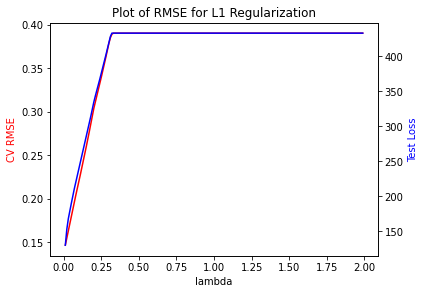

In [30]:
##plot l1 reg CV and test RMSE
rmse_test2 = plot_loss_lambda(alphalist, 1, Xstandardized, log_y_train, test_Xstandardized, log_y_test)

fig, ax = plt.subplots()
ax.set_xlabel('lambda')
ax.set_ylabel('CV RMSE',color = "red")
ax2 = ax.twinx()
ax2.set_ylabel('Test Loss',color = 'blue')
   
ax.plot(alphalist, RMSE_list1, color = "red")
ax2.plot(alphalist, rmse_test2, color="blue")
fig.tight_layout()
plt.title("Plot of RMSE for L1 Regularization")
plt.show()

In [31]:
from sklearn.linear_model import RidgeCV
l2_test = RidgeCV(alphas = lambdalist).fit(Xstandardized, log_y_train)
l2_test.alpha_

4.99

In [32]:
#use build in function to test cv result
from sklearn.linear_model import LassoCV
l1_test = LassoCV(alphas = lambdalist).fit(Xstandardized, log_y_train)
l1_test.alpha_

0.01

##Feature Selection Using PCA


In [11]:
from sklearn.decomposition import PCA
pca = PCA(.80) #retain 80% of the total variance
pca.fit(Xstandardized)
explain_var_percent = pca.explained_variance_ratio_
print('number of components PCA has retained', pca.n_components_)

number of components PCA has retained 97


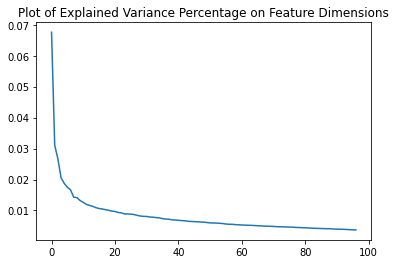

In [12]:
#plot explained varianc aka the elbow curve
plt.plot(explain_var_percent)
plt.title('Plot of Explained Variance Percentage on Feature Dimensions')
plt.show()

In [13]:
#Reduce Dimension 
D = len(explain_var_percent) #reduce 244 cols to 97 cols
train_components = pca.transform(Xstandardized) #transform training set to 97 variables
test_components = pca.transform(test_Xstandardized) #transform test set to 97 variables


In [76]:
#check shape
print('train X shape', pd.DataFrame(train_components).shape)
print('test X shape' , pd.DataFrame(test_components).shape)

train X shape (1168, 97)
test X shape (292, 97)


#Linear Regression Model on PCA dataset (D' = 97)

In [14]:
#apply linear regression on principal components
from sklearn.linear_model import LinearRegression
pca_linear = LinearRegression()
pca_linear.fit(train_components, y_train)
pca_y_train_predict = pca_linear.predict(train_components)

#MSE train
from sklearn.metrics import mean_squared_error
pca_train_RMSE = mean_squared_error(y_train, pca_y_train_predict, squared=False)
print('PCA train RMSE', pca_train_RMSE)

#MSE Test
pca_y_test_predict = pca_linear.predict(test_components)
pca_test_RMSE = mean_squared_error(y_test, pca_y_test_predict, squared=False)
print('PCA test RMSE', pca_test_RMSE)

PCA train RMSE 28818.64666261907
PCA test RMSE 36668.748943213744


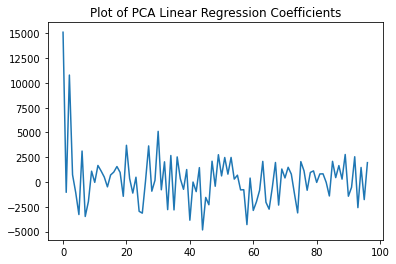

In [73]:
pca_coef = pd.DataFrame(pca_linear.coef_)
plt.plot(pca_coef) 
#plt.ylim(-25, 25)
plt.title('Plot of PCA Linear Regression Coefficients')
plt.show()

PCA with Log Transform of Y


*   The bias term is significantly higher than the other coefficents
*   Log transform of Y may resolve this issue



In [15]:
#PCA with Log Transform of Y

pca_log_linear = LinearRegression()
pca_log_linear.fit(train_components, log_y_train)
pca_logy_train_predict = pca_log_linear.predict(train_components)

#MSE train
pca_exp_y_train_predict = pd.DataFrame(pca_logy_train_predict).apply(np.exp)
pca_log_train_RMSE = mean_squared_error(y_train, pca_exp_y_train_predict, squared=False)
print('pca log y train RMSE', pca_log_train_RMSE)

#MSE test
pca_logy_test_predict = pca_log_linear.predict(test_components)
pca_expy_test_predict = pd.DataFrame(pca_logy_test_predict).apply(np.exp)
pca_log_test_RMSE = mean_squared_error(y_test, pca_expy_test_predict, squared= False)
print('pca log y test RMSE', pca_log_test_RMSE)

pca log y train RMSE 24840.12627567631
pca log y test RMSE 29331.92165333755


PCA with Log Y has reduced the RMSE. The predicted value is only 23k away from the real sale price 

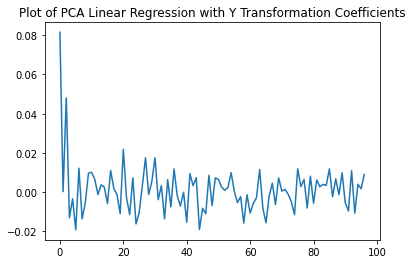

In [39]:
pca_log_coef = pd.DataFrame(pca_log_linear.coef_)
plt.plot(pca_log_coef) 
#plt.ylim(-25, 25)
plt.title('Plot of PCA Linear Regression with Y Transformation Coefficients')
plt.show()

# Support Vector Regression

Running initial models

In [16]:
from sklearn.svm import SVR


#-----Linear kernel-------
svr_linear = SVR(kernel = "linear")
svr_linear.fit(Xstandardized, y_train)
svr_linear_y_train_predict = svr_linear.predict(Xstandardized)

#MSE train

linear_train_MSE = mean_squared_error(y_train, svr_linear_y_train_predict)
print('Linear kernel train MSE', linear_train_MSE)
#MSE Test
svr_linear_y_test_predict = svr_linear.predict(test_Xstandardized)
linear_test_MSE = mean_squared_error(y_test, svr_linear_y_test_predict)
print('Linear kernel test MSE', linear_test_MSE)


#-----rbf kernel-----------
svr_rbf = SVR()
svr_rbf.fit(Xstandardized, y_train)
svr_rbf_y_train_predict = svr_rbf.predict(Xstandardized)

#MSE train

rbf_train_MSE = mean_squared_error(y_train, svr_rbf_y_train_predict)
print('rbf kernel train MSE', rbf_train_MSE)
print('rbf kernel train RMSE', mean_squared_error(y_train, svr_rbf_y_train_predict, squared = False))
#MSE Test
svr_rbf_y_test_predict = svr_rbf.predict(test_Xstandardized)
rbf_test_MSE = mean_squared_error(y_test, svr_rbf_y_test_predict)
print('rbf kernel test MSE', rbf_test_MSE)
print('rbf kernel test RMSE', mean_squared_error(y_test, svr_rbf_y_test_predict, squared = False))


#-----sigmoid kernel-----------
svr_sigmoid = SVR(kernel = "sigmoid")
svr_sigmoid.fit(Xstandardized, y_train)
svr_sigmoid_y_train_predict = svr_sigmoid.predict(Xstandardized)

#MSE train

sigmoid_train_MSE = mean_squared_error(y_train, svr_sigmoid_y_train_predict)
print('sigmoid kernel train MSE', sigmoid_train_MSE)
#MSE Test
svr_sigmoid_y_test_predict = svr_sigmoid.predict(test_Xstandardized)
sigmoid_test_MSE = mean_squared_error(y_test, svr_sigmoid_y_test_predict)
print('sigmoid kernel test MSE', sigmoid_test_MSE)


#-----poly kernel-----------
svr_poly = SVR(kernel = "poly")
svr_poly.fit(Xstandardized, y_train)
svr_poly_y_train_predict = svr_poly.predict(Xstandardized)

#MSE train

poly_train_MSE = mean_squared_error(y_train, svr_poly_y_train_predict)
print('poly kernel train MSE', poly_train_MSE)
#MSE Test
svr_poly_y_test_predict = svr_poly.predict(test_Xstandardized)
poly_test_MSE = mean_squared_error(y_test, svr_poly_y_test_predict)
print('poly kernel test MSE', poly_test_MSE)







Linear kernel train MSE 4720835713.702892
Linear kernel test MSE 6068540581.826603
rbf kernel train MSE 6231747451.445648
rbf kernel train RMSE 78941.41784542287
rbf kernel test MSE 7858364136.617225
rbf kernel test RMSE 88647.41472043742
sigmoid kernel train MSE 6227667415.345335
sigmoid kernel test MSE 7853357444.2264805
poly kernel train MSE 6233106679.902313
poly kernel test MSE 7860861925.030521


In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Sample')
ax.set_ylabel('Predicted price',color = "red")
ax2 = ax.twinx()
ax2.set_ylabel('Actual price',color = 'blue')
   
ax.plot(svr_linear_y_test_predict, color = "red")
ax2.plot(y_test, color="blue")
fig.tight_layout()
plt.title("SVR Basic Linear Kernel")
plt.show()

Tuning of parameters

In [ ]:
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernels = ['linear']
#Cs = [1, 1.25, 1.5, 2, 0.75, 0.5, 0.25, 0.1, 0.01]
#Cs = [2, 2.5, 3, 3.5]
#Cs = [3.5, 4, 5, 10, 15, 20]
Cs = [20, 40, 60, 100, 140, 200]
#Cs = [200, 1000, 5000 ,10000]
coef0s = [0, 0.01, 0.005, 0.1, 0.2, 0.5, 1]
#tols = [0.01, 0.005, 0.001, 0.0001, 0.00001]
#tols = [0.002, 0.0015, 0.001, 0.00095, 0.0009]
tols = [0.002, 0.00175, 0.0015, 0.00125, 0.001]
#tols = [0.001]
#epsilons = [0.001, 0.005, 0.1, 0.2, 0.5]
#epsilons = [0.002, 0.0015, 0.001, 0.00095, 0.0009]
epsilons = [0.0009, 0.0008, 0.0007, 0.0001, 0.00001]
#epsilons = [0.0001]

best_kernel = ''
best_params = []
best_test_MSE = 7860771631
best_test_RMSE = 0
for k in kernels:
  for big_c in Cs:
    for t in tols:
      for e in epsilons:
        if k == 'poly' or k == 'sigmoid':
          for co in coef0s:
            svr = SVR(kernel = k, C = big_c, tol = t, epsilon = e, coef0 = co)
            svr.fit(Xstandardized, y_train)
            svr_y_train_predict = svr.predict(Xstandardized)

            #MSE train
            from sklearn.metrics import mean_squared_error
            svr_train_MSE = mean_squared_error(y_train, svr_y_train_predict)
            #MSE Test
            svr_y_test_predict = svr.predict(test_Xstandardized)
            svr_test_MSE = mean_squared_error(y_test, svr_y_test_predict)
            print("Kernel: ", k, "Tollerance: ", t, "C:", big_c, "Epsilon: ", e, "Coef0", co, 'Train MSE: ', svr_train_MSE, 'Test MSE: ', svr_test_MSE)
            if svr_test_MSE < best_test_MSE:
              best_test_MSE = svr_test_MSE
              best_params = [big_c, t, e, co]
              best_kernel = k
        else:
          svr = SVR(kernel = k, C = big_c, tol = t, epsilon = e)
          svr.fit(Xstandardized, y_train)
          svr_y_train_predict = svr.predict(Xstandardized)

          #MSE train
          from sklearn.metrics import mean_squared_error
          svr_train_MSE = mean_squared_error(y_train, svr_y_train_predict)
          #MSE Test
          svr_y_test_predict = svr.predict(test_Xstandardized)
          svr_test_MSE = mean_squared_error(y_test, svr_y_test_predict)
          svr_test_RMSE = mean_squared_error(y_test, svr_y_test_predict, squared=False)
          print("Kernel: ", k, "Tollerance: ", t, "C:", big_c, "Epsilon: ", e, 'Train MSE: ', svr_train_MSE, 'Test MSE: ', svr_test_MSE)
          if svr_test_MSE < best_test_MSE:
              best_test_MSE = svr_test_MSE
              best_params = [big_c, t, e]
              best_kernel = k
              best_test_RMSE = svr_test_RMSE
# first batch best params = [2, 0.005, 0.001]
# second batch [3.5, 0.0015, 0.0009], mse 3401946370.8068585
# third batch [20, 0.001, 1e-05],     mse 1166076823.5728486
# fourth batch [200, 0.001, 1e-05]    mse 159648068.97768006
# Correct batch [200, 0.0015, 0.0009]

In [21]:
print(best_params)
print(best_test_MSE)

[200, 0.0015, 0.0009]
1019789438.5888727


In [63]:
params_svr1 = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [3.5, 4, 5, 10, 15, 20], 
    'epsilon': [0.0009, 0.0008, 0.0007, 0.0001, 0.00001],
    'tol': [0.002, 0.00175, 0.0015, 0.00125, 0.001]
}

from sklearn.model_selection import GridSearchCV

grid_svr1 = GridSearchCV(svr_rbf, params_svr1, n_jobs=-1)
grid_svr1.fit(Xstandardized, y_train)

print('Best parameters found:', grid_svr1.best_params_)

Best parameters found: {'C': 20, 'epsilon': 0.0009, 'kernel': 'linear', 'tol': 0.00175}


In [71]:
grid_svr1_scores = grid_svr1.cv_results_

In [18]:
params_svr2 = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [20, 40, 60, 100, 140, 200], 
    'epsilon': [0.1, 0.01, 0.005, 0.0025, 0.001, 0.0009],
    'tol': [0.002, 0.00185, 0.00175, 0.00165, 0.0015]
}

grid_svr2 = GridSearchCV(svr_rbf, params_svr2, n_jobs=-1)
grid_svr2.fit(Xstandardized, y_train)

print('Best parameters found:', grid_svr2.best_params_)

Best parameters found: {'C': 100, 'epsilon': 0.001, 'kernel': 'linear', 'tol': 0.0015}


Running a model with the tuned parameters

In [17]:
svr_best = SVR(kernel = 'linear', C = 100, tol = 0.0015, epsilon = 0.001)
svr_best.fit(Xstandardized, y_train)
svr_best_y_train_predict = svr_best.predict(Xstandardized)

#MSE train

svr_best_train_MSE = mean_squared_error(y_train, svr_best_y_train_predict)
print('Best train MSE', svr_best_train_MSE)
print('Best train RMSE', mean_squared_error(y_train, svr_best_y_train_predict, squared = False))
#MSE Test
svr_best_y_test_predict = svr_best.predict(test_Xstandardized)
svr_best_test_MSE = mean_squared_error(y_test, svr_best_y_test_predict)
print('Best test MSE', svr_best_test_MSE)
print('Best test RMSE', mean_squared_error(y_test, svr_best_y_test_predict, squared = False))

Best train MSE 812262761.2122934
Best train RMSE 28500.22388003809
Best test MSE 1087655306.7424948
Best test RMSE 32979.61956637


# Random forests

Running an initial model

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_basic = RandomForestRegressor()
rf_basic.fit(Xstandardized, y_train)
rf_basic_y_train_predict = rf_basic.predict(Xstandardized)

#MSE train

rf_basic_train_MSE = mean_squared_error(y_train, rf_basic_y_train_predict)
print('train MSE', rf_basic_train_MSE)
print('train RMSE', mean_squared_error(y_train, rf_basic_y_train_predict, squared = False))
#MSE Test
rf_basic_y_test_predict = rf_basic.predict(test_Xstandardized)
rf_basic_test_MSE = mean_squared_error(y_test, rf_basic_y_test_predict)
print('test MSE', rf_basic_test_MSE)
print('test RMSE', mean_squared_error(y_test, rf_basic_y_test_predict, squared = False))

train MSE 126798365.39735188
train RMSE 11260.478027035613
test MSE 845414881.8236113
test RMSE 29076.019016082846


Tuning parameters

In [26]:
n_estimators = [30, 50, 75, 100, 125, 150]
max_depth = [5, 4, 3]
min_samples_split = [2, 3, 4, 10, 100]

rf_params = []
rf_mse = 84243219000

for n in n_estimators:
  for d in max_depth:
    for a in min_samples_split:
      rf = RandomForestRegressor(n_estimators = n, max_depth=d, min_samples_split=a)
      rf.fit(Xstandardized, y_train)
      rf_y_train_predict = rf.predict(Xstandardized)
      #MSE train
      from sklearn.metrics import mean_squared_error
      rf_train_MSE = mean_squared_error(y_train, rf_y_train_predict)
      #MSE Test
      rf_y_test_predict = rf.predict(test_Xstandardized)
      rf_test_MSE = mean_squared_error(y_test, rf_y_test_predict)
      print('n_estimators =', n, 'max_depth = ', d, 'min_samples_split=', a, 'train MSE', rf_train_MSE, 'test MSE', rf_test_MSE)
      if rf_test_MSE < rf_mse:
        rf_params = [n, d, a]
        rf_mse = rf_test_MSE

# first run params [50, 5, 3] error = 81196663.46111205

n_estimators = 30 max_depth =  5 min_samples_split= 2 train MSE 587894434.4654243 test MSE 1070385079.3573884
n_estimators = 30 max_depth =  5 min_samples_split= 3 train MSE 586274706.11494 test MSE 981323299.82976
n_estimators = 30 max_depth =  5 min_samples_split= 4 train MSE 558807340.8475844 test MSE 1156502939.4046757
n_estimators = 30 max_depth =  5 min_samples_split= 10 train MSE 579126577.6152018 test MSE 1072818106.6030589
n_estimators = 30 max_depth =  5 min_samples_split= 100 train MSE 1044938071.2274488 test MSE 1500631621.7959933
n_estimators = 30 max_depth =  4 min_samples_split= 2 train MSE 819109639.6766194 test MSE 1202099908.6941557
n_estimators = 30 max_depth =  4 min_samples_split= 3 train MSE 805306919.3541858 test MSE 1295353368.5172923
n_estimators = 30 max_depth =  4 min_samples_split= 4 train MSE 819642508.0050054 test MSE 1252217252.666252
n_estimators = 30 max_depth =  4 min_samples_split= 10 train MSE 817143398.3140666 test MSE 1223786278.7024665
n_estimator

In [27]:
print(rf_params)
print(rf_mse)

[30, 5, 3]
981323299.82976


In [23]:
params_rf = {
    'n_estimators': [50, 75, 100, 125, 150],
    'bootstrap': [True, False]
    'max_depth': [4, 5, 6, 10, 7, 8],
    'min_samples_split': [3, 4, 5], # [2, 3, 4, 10, 100],
}

grid_rf = GridSearchCV(rf_basic, params_rf, n_jobs=-1)
grid_rf.fit(Xstandardized, y_train)

print('Best parameters found:', grid_rf.best_params_)

Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 75}


In [ ]:
'''Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 75}'''
'''Best parameters found: {'bootstrap': True, 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 20}'''
'''Best parameters found: {'bootstrap': True, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 30}'''

Running a model with the tuned parameters

In [19]:
rf_best = RandomForestRegressor(n_estimators = 75, max_depth = 10, bootstrap = True, min_samples_split = 5)
rf_best.fit(Xstandardized, y_train)
rf_best_y_train_predict = rf_best.predict(Xstandardized)

#MSE train
rf_best_train_MSE = mean_squared_error(y_train, rf_best_y_train_predict)
print('Best train MSE', rf_best_train_MSE)
print('train RMSE', mean_squared_error(y_train, rf_best_y_train_predict, squared = False))
#MSE Test
rf_best_y_test_predict = rf_best.predict(test_Xstandardized)
rf_best_test_MSE = mean_squared_error(y_test, rf_best_y_test_predict)
print('Best test MSE', rf_best_test_MSE)
print('Best test RMSE', mean_squared_error(y_test, rf_best_y_test_predict, squared = False))

Best train MSE 185191050.11460105
train RMSE 13608.49183835597
Best test MSE 854002291.8107531
Best test RMSE 29223.31760445335


# Neural Net Regression

Running an initial model

In [20]:
from sklearn.neural_network import MLPRegressor


mlp_basic = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.001)
mlp_basic.fit(Xstandardized, y_train)
mlp_basic_y_train_predict = mlp_basic.predict(Xstandardized)

#MSE train
mlp_basic_train_MSE = mean_squared_error(y_train, mlp_basic_y_train_predict)
print('train MSE', mlp_basic_train_MSE)
print('train RMSE', mean_squared_error(y_train, mlp_basic_y_train_predict, squared = False))
#MSE Test
mlp_basic_y_test_predict = mlp_basic.predict(test_Xstandardized)
mlp_basic_test_MSE = mean_squared_error(y_test, mlp_basic_y_test_predict)
print('test MSE', mlp_basic_test_MSE)
print('test RMSE', mean_squared_error(y_test, mlp_basic_y_test_predict, squared = False))

train MSE 36851026752.584
train RMSE 191966.2125286218
test MSE 37588818835.52033
test RMSE 193878.3609264333


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
print(Xstandardized.isnull().values.any())

False


In [10]:
print(y_train.isnull().values.any())

False


Tuning parameters

In [26]:
params_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'], #['sgd', 'adam'], - sgd throws errors / maybe mention in the repport - lbfgs didnot converge
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['invscaling', 'constant','adaptive'],
    'learning_rate_init': [0.001, 0.005, 0.01]
}


grid_mlp = GridSearchCV(mlp_basic, params_mlp, n_jobs=-1)
grid_mlp.fit(Xstandardized, y_train)

print('Best parameters found:', grid_mlp.best_params_)

Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
'''Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'solver': 'adam'}

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
'''

'''Best parameters found: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
'''

'''Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'adam'}

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)'''



'''Best parameters found: {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.'''

Running a model with the tuned parameters

In [21]:
mlp_best = MLPRegressor(learning_rate='invscaling', learning_rate_init=0.01, solver = 'adam', hidden_layer_sizes = (50, 100, 50), alpha = 0.001, activation='relu')
mlp_best.fit(Xstandardized, y_train)
mlp_best_y_train_predict = mlp_best.predict(Xstandardized)

#MSE train
mlp_best_train_MSE = mean_squared_error(y_train, mlp_best_y_train_predict)
print('Best train MSE', mlp_best_train_MSE)
print('train RMSE', mean_squared_error(y_train, mlp_best_y_train_predict, squared = False))
#MSE Test
mlp_best_y_test_predict = mlp_best.predict(test_Xstandardized)
mlp_best_test_MSE = mean_squared_error(y_test, mlp_best_y_test_predict)
print('Best test MSE', mlp_best_test_MSE)
print('Best test RMSE', mean_squared_error(y_test, mlp_best_y_test_predict, squared = False))

Best train MSE 49782509.95448622
train RMSE 7055.672183037292
Best test MSE 987289765.3336955
Best test RMSE 31421.16747248096


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Gradient Boosting Regression

Running an initial model

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
gbr_basic = GradientBoostingRegressor()
gbr_basic.fit(Xstandardized, y_train)

gbr_basic_y_train_predict = gbr_basic.predict(Xstandardized)
gbr_basic_train_MSE = mean_squared_error(y_train, gbr_basic_y_train_predict)
print('train MSE', gbr_basic_train_MSE)
print('train RMSE', mean_squared_error(y_train, gbr_basic_y_train_predict, squared = False))
gbr_basic_y_test_predict = gbr_basic.predict(test_Xstandardized)
gbr_basic_test_MSE = mean_squared_error(y_test, gbr_basic_y_test_predict)
print('test MSE', gbr_basic_test_MSE)
print('test RMSE', mean_squared_error(y_test, gbr_basic_y_test_predict, squared = False))

train MSE 175641222.36657235
train RMSE 13252.97032240593
test MSE 759395185.7039105
test RMSE 27557.125860726304


Tuning parameters

In [29]:
params_gbr1 = {
    'loss': ['squared_error', 'ls', 'lad', 'huber', 'quantile'],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.8],
    'n_estimators': [10, 25, 50, 100, 200],
    'max_depth': [2, 3, 5, 7],
    'validation_fraction': [0.1, 0.15, 0.2]
}

from sklearn.model_selection import GridSearchCV
grid_gbr1 = GridSearchCV(gbr_basic, params_gbr1, n_jobs=-1)
grid_gbr1.fit(Xstandardized, y_train)

print('Best parameters found:', grid_gbr1.best_params_)

Best parameters found: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 200, 'validation_fraction': 0.15}


In [ ]:
'''Best parameters found: {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 200, 'validation_fraction': 0.1}'''
'''Best parameters found: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 200, 'validation_fraction': 0.15}'''

In [ ]:
params_gbr2 = {
    'loss': ['squared_error', 'lad', 'huber'],
    'learning_rate': [0.1],
    'n_estimators': [200, 220, 250, 270, 300],
    'max_depth': [3],
    'validation_fraction': [0.15]
}

from sklearn.model_selection import GridSearchCV
grid_gbr2 = GridSearchCV(gbr_basic, params_gbr2, n_jobs=-1)
grid_gbr2.fit(Xstandardized, y_train)

print('Best parameters found:', grid_gbr2.best_params_)

Running a model with tuned parameters

In [23]:
gbr_best = GradientBoostingRegressor(learning_rate=0.1, loss='huber', max_depth=3, n_estimators=270, validation_fraction=0.15)
gbr_best.fit(Xstandardized, y_train)

gbr_best_y_train_predict = gbr_best.predict(Xstandardized)
gbr_best_train_MSE = mean_squared_error(y_train, gbr_best_y_train_predict)
print('Best train MSE', gbr_best_train_MSE)
print('train RMSE', mean_squared_error(y_train, gbr_best_y_train_predict, squared = False))
gbr_best_y_test_predict = gbr_best.predict(test_Xstandardized)
gbr_best_test_MSE = mean_squared_error(y_test, gbr_best_y_test_predict)
print('Best test MSE', gbr_best_test_MSE)
print('Best test RMSE', mean_squared_error(y_test, gbr_best_y_test_predict, squared = False))

Best train MSE 121079395.8742803
train RMSE 11003.60831156218
Best test MSE 699722130.1151145
Best test RMSE 26452.261342182344


# Ensamble dataset

Creating the new train and test regressor sets

In [24]:
#Combining the predictions of our models into a new train and test sets
X_train_new_r = pd.concat([pd.DataFrame(gbr_best_y_train_predict), pd.DataFrame(mlp_best_y_train_predict),
                         pd.DataFrame(rf_best_y_train_predict), pd.DataFrame(svr_best_y_train_predict), 
                         pd.DataFrame(pca_exp_y_train_predict), pd.DataFrame(l2_train_predict), 
                         pd.DataFrame(l1_train_predict), pd.DataFrame(y_train_predict)], axis = 1)
X_test_new_r = pd.concat([pd.DataFrame(gbr_best_y_test_predict), pd.DataFrame(mlp_best_y_test_predict), 
                        pd.DataFrame(rf_best_y_test_predict), pd.DataFrame(svr_best_y_test_predict), 
                        pd.DataFrame(pca_expy_test_predict), pd.DataFrame(l2_y_test_predict), 
                        pd.DataFrame(l1_y_test_predict), pd.DataFrame(y_test_predict)], axis = 1)

standardizer = StandardScaler()
X_train_new = pd.DataFrame(standardizer.fit_transform(X_train_new_r))
X_test_new = pd.DataFrame(standardizer.transform(X_test_new_r))

Running an initial model

In [25]:
#As it had the best results during standalone testing, we will use GradientBoostingRegressor as our top layer in our ensemble
ensemble_basic = GradientBoostingRegressor()
ensemble_basic.fit(X_train_new, y_train)

ensemble_basic_y_train_predict = ensemble_basic.predict(X_train_new)
ensemble_basic_train_MSE = mean_squared_error(y_train, ensemble_basic_y_train_predict)
print('train MSE', ensemble_basic_train_MSE)
print('train RMSE', mean_squared_error(y_train, ensemble_basic_y_train_predict, squared = False))

ensemble_basic_y_test_predict = ensemble_basic.predict(X_test_new)
ensemble_basic_test_MSE = mean_squared_error(y_test, ensemble_basic_y_test_predict)
print('test MSE', ensemble_basic_test_MSE)
print('test RMSE', mean_squared_error(y_test, ensemble_basic_y_test_predict, squared = False))

train MSE 15163577.016942084
train RMSE 3894.043787239954
test MSE 783128694.3843942
test RMSE 27984.43664582859


Tuning parameters

In [26]:
params_ensemble1 = {
    'loss': ['squared_error', 'lad', 'huber'],
    'learning_rate': [0.01, 0.1, 0.2, 0.8],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 5, 7],
    'validation_fraction': [0.1, 0.15, 0.2]
}

from sklearn.model_selection import GridSearchCV

grid_gbr1 = GridSearchCV(ensemble_basic, params_ensemble1, n_jobs=-1)
grid_gbr1.fit(X_train_new, y_train)

print('Best parameters found:', grid_gbr1.best_params_)

Best parameters found: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 200, 'validation_fraction': 0.2}


In [27]:
params_ensemble2 = {
    'loss': ['lad', 'huber'],
    'learning_rate': [0.1, 0.11, 0.12],
    'n_estimators': [200, 220, 250, 270],
    'max_depth': [3],
    'validation_fraction': [0.15, 0.175, 0.2]
}

from sklearn.model_selection import GridSearchCV

grid_gbr2 = GridSearchCV(ensemble_basic, params_ensemble2, n_jobs=-1)
grid_gbr2.fit(X_train_new, y_train)

print('Best parameters found:', grid_gbr2.best_params_)

Best parameters found: {'learning_rate': 0.12, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 250, 'validation_fraction': 0.2}


In [30]:
params_ensemble3 = {
    'loss': ['huber'],
    'learning_rate': [0.12, 0.14, 0.16, 0.18, 0.2],
    'n_estimators': [220, 250, 270, 280],
    'max_depth': [3],
    'validation_fraction': [0.2, 0.225, 0.25, 0.27, 0.3]
}

from sklearn.model_selection import GridSearchCV

grid_gbr3 = GridSearchCV(ensemble_basic, params_ensemble3, n_jobs=-1)
grid_gbr3.fit(X_train_new, y_train)

print('Best parameters found:', grid_gbr3.best_params_)

Best parameters found: {'learning_rate': 0.12, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 220, 'validation_fraction': 0.2}


Running a model with the tuned parameters

In [31]:
ensemble_best = GradientBoostingRegressor(learning_rate=0.12, loss='huber', max_depth=3, n_estimators=220, validation_fraction=0.2)
ensemble_best.fit(X_train_new, y_train)

ensemble_best_y_train_predict = ensemble_best.predict(X_train_new)
ensemble_best_train_MSE = mean_squared_error(y_train, ensemble_best_y_train_predict)
print('Best train MSE', ensemble_best_train_MSE)
print('Best train RMSE', mean_squared_error(y_train, ensemble_best_y_train_predict, squared=False))

ensemble_best_y_test_predict = ensemble_best.predict(X_test_new)
ensemble_best_test_MSE = mean_squared_error(y_test, ensemble_best_y_test_predict)
print('Best test MSE', ensemble_best_test_MSE)
print('Best test RMSE', mean_squared_error(y_test, ensemble_best_y_test_predict, squared = False))

Best train MSE 12826791.023503989
Best train RMSE 3581.4509662291885
Best test MSE 836299150.4555476
Best test RMSE 28918.83729432336


Removing svr, pca and mlp from the ensamble

In [28]:
#Combining the predictions of our models into a new train and test sets

'''X_train_new1 = pd.concat([pd.DataFrame(gbr_best_y_train_predict), pd.DataFrame(mlp_best_y_train_predict),
                         pd.DataFrame(rf_best_y_train_predict), pd.DataFrame(svr_best_y_train_predict), 
                         pd.DataFrame(pca_exp_y_train_predict), pd.DataFrame(l2_train_predict), 
                         pd.DataFrame(l1_train_predict), pd.DataFrame(y_train_predict)], axis = 1)
X_test_new1 = pd.concat([pd.DataFrame(gbr_best_y_test_predict), pd.DataFrame(mlp_best_y_test_predict), 
                        pd.DataFrame(rf_best_y_test_predict), pd.DataFrame(svr_best_y_test_predict), 
                        pd.DataFrame(pca_expy_test_predict), pd.DataFrame(l2_y_test_predict), 
                        pd.DataFrame(l1_y_test_predict), pd.DataFrame(y_test_predict)], axis = 1)'''

X_train_new1_r = pd.concat([pd.DataFrame(gbr_best_y_train_predict),
                         pd.DataFrame(rf_best_y_train_predict), pd.DataFrame(l1_train_predict), pd.DataFrame(l2_train_predict), pd.DataFrame(y_train_predict)], axis = 1)
X_test_new1_r = pd.concat([pd.DataFrame(gbr_best_y_test_predict), 
                        pd.DataFrame(rf_best_y_test_predict), pd.DataFrame(l1_y_test_predict), pd.DataFrame(l2_y_test_predict), pd.DataFrame(y_test_predict)], axis = 1)
standardizer = StandardScaler()
X_train_new1 = pd.DataFrame(standardizer.fit_transform(X_train_new1_r))
X_test_new1 = pd.DataFrame(standardizer.transform(X_test_new1_r))

In [32]:
ensemble_basic1 = GradientBoostingRegressor()
ensemble_basic1.fit(X_train_new1, y_train)

ensemble_basic1_y_train_predict = ensemble_basic1.predict(X_train_new1)
ensemble_basic1_train_MSE = mean_squared_error(y_train, ensemble_basic1_y_train_predict)
print('train MSE', ensemble_basic1_train_MSE)
print('train RMSE', mean_squared_error(y_train, ensemble_basic1_y_train_predict, squared=False))

ensemble_basic1_y_test_predict = ensemble_basic1.predict(X_test_new1)
ensemble_basic1_test_MSE = mean_squared_error(y_test, ensemble_basic1_y_test_predict)
print('test MSE', ensemble_basic1_test_MSE)
print('test RMSE', mean_squared_error(y_test, ensemble_basic1_y_test_predict, squared = False))

train MSE 49319141.731015645
train RMSE 7022.758840442668
test MSE 643470124.8248974
test RMSE 25366.712929051282


In [98]:
params_ensemble4 = {
    'loss': ['squared_error', 'lad', 'huber'],
    'learning_rate': [0.01, 0.1, 0.2, 0.8],
    'n_estimators': [100, 200, 250, 270, 300],
    'max_depth': [2, 3, 5, 7],
    'validation_fraction': [0.1, 0.15, 0.2]
}

from sklearn.model_selection import GridSearchCV

grid_gbr4 = GridSearchCV(ensemble_basic1, params_ensemble4, n_jobs=-1)
grid_gbr4.fit(X_train_new1, y_train)

print('Best parameters found:', grid_gbr4.best_params_)

Best parameters found: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 300, 'validation_fraction': 0.1}


In [35]:
ensemble_best = GradientBoostingRegressor(learning_rate=0.1, loss='huber', max_depth=3, n_estimators=280, validation_fraction=0.15)
ensemble_best.fit(X_train_new1, y_train)

ensemble_best_y_train_predict = ensemble_best.predict(X_train_new1)
ensemble_best_train_MSE = mean_squared_error(y_train, ensemble_best_y_train_predict)
print('Best train MSE', ensemble_best_train_MSE)
print('Best train RMSE', mean_squared_error(y_train, ensemble_best_y_train_predict, squared=False))

ensemble_best_y_test_predict = ensemble_best.predict(X_test_new1)
ensemble_best_test_MSE = mean_squared_error(y_test, ensemble_best_y_test_predict)
print('Best test MSE', ensemble_best_test_MSE)
print('Best test RMSE', mean_squared_error(y_test, ensemble_best_y_test_predict, squared = False))

Best train MSE 34874737.59161892
Best train RMSE 5905.483688201917
Best test MSE 621132854.471341
Best test RMSE 24922.537079345293


In [80]:
print(np.mean(y_test))

178839.81164383562


# Additional work: Exploratory Classification with SVMs and RF

In [ ]:
df = pd.read_csv('housetrain.csv')
df['Housetype'] = np.where(df['SalePrice'] > 214000, 3, np.where(df['SalePrice'] < 129975, 1, 2))
y = df['Housetype']

nrow, ncol = df.shape
for i in range(0, ncol - 1): 
    if df.iloc[:,i].dtype == 'O':
        df.iloc[:,i] = df.iloc[:,i].astype('category')

pd.Categorical(df['OverallQual'], ordered=True) #of int type (do not need to convert)

df['ExterQual'] = df['ExterQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['ExterQual'] = df['ExterQual'].cat.codes

df['ExterCond'] = df['ExterCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['ExterCond'] = df['ExterCond'].cat.codes

df['BsmtQual'] = df['BsmtQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['BsmtQual'] = df['BsmtQual'].cat.codes

df['BsmtCond'] = df['BsmtCond'].cat.reorder_categories(['Po','Fa','TA','Gd'], ordered = True)
df['BsmtCond'] = df['BsmtCond'].cat.codes

df['BsmtFinType1'] = df['BsmtFinType1'].cat.reorder_categories(['Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)
df['BsmtFinType1'] = df['BsmtFinType1'].cat.codes

df['BsmtFinType2']= df['BsmtFinType2'].cat.reorder_categories(['Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)
df['BsmtFinType2']= df['BsmtFinType2'].cat.codes

df['HeatingQC'] = df['HeatingQC'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['HeatingQC'] = df['HeatingQC'].cat.codes

df['KitchenQual'] = df['KitchenQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['KitchenQual'] = df['KitchenQual'].cat.codes

df['FireplaceQu']= df['FireplaceQu'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['FireplaceQu']= df['FireplaceQu'].cat.codes

df['GarageQual'] = df['GarageQual'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['GarageQual'] = df['GarageQual'].cat.codes

df['GarageCond'] = df['GarageCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['GarageCond'] = df['GarageCond'].cat.codes

#print(df.shape)
#DROP columns that contain too many NaN
df = df.drop(columns=['PoolQC','Id','SalePrice', 'Housetype'])
#print(df.shape)
#use ONE HOT encoding for NOMINAL categorical columns 
df = pd.get_dummies(df)
#print(df.shape)

df = df.fillna(df.mean())
from sklearn.model_selection import train_test_split
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Classification 

from sklearn import svm, datasets
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))